## 1. Generative Models for Text

(a) (b) completed outside of this notebook

(c) LSTM:

i.

In [103]:
#from google.colab import drive
#drive.mount('/content/drive')
# using google colab to reduce runtime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import os
import pandas as pd
import numpy as np

#file_path = '/content/drive/MyDrive/Homework 7 Data/data/Book Files/books'
file_path = '../data/Book Files/books/'
books = os.listdir(file_path)
corpus = ''

for item in books:
    with open(os.path.join(file_path, item), 'r', encoding = 'utf8', errors = 'replace') as f:
        string = f.read().encode('utf8').decode('ascii', 'ignore').replace('\n', '')
        corpus = corpus + string

In [105]:
books # reduced number of books to reduce runtime

['MLOE.txt', 'TPP.txt', 'OKEWFSMP.txt', 'TAM.txt']

In [106]:
len(corpus)

1551097

In [107]:
print(corpus[:500])

MYSTICISM AND LOGIC AND OTHER ESSAYSIMYSTICISM AND LOGICMetaphysics, or the attempt to conceive the world as a whole by meansof thought, has been developed, from the first, by the union andconflict of two very different human impulses, the one urging mentowards mysticism, the other urging them towards science. Some menhave achieved greatness through one of these impulses alone, othersthrough the other alone: in Hume, for example, the scientific impulsereigns quite unchecked, while in Blake a str


ii.

In [108]:
from sklearn.preprocessing import MinMaxScaler

corpus = corpus.lower()
char = set(corpus)

In [109]:
print(char)

{'"', '(', 'h', 'a', 'g', '4', 'p', 'f', '=', ']', '_', 'k', 'n', 'x', '3', ':', '8', ')', 'v', 'm', '&', 'i', 'e', '}', '5', 'j', '?', 'z', '{', 'd', 'u', ' ', 'o', '>', '7', '0', "'", '[', 'l', ',', 'q', '2', 'b', '-', 's', '6', '/', '1', 'w', 'c', 'r', '!', '+', ';', 't', 'y', '.', '9', '|', '*'}


In [110]:
charDict = dict()
for i, c in enumerate(sorted(char)):
    charDict[c] = i
print(charDict)

{' ': 0, '!': 1, '"': 2, '&': 3, "'": 4, '(': 5, ')': 6, '*': 7, '+': 8, ',': 9, '-': 10, '.': 11, '/': 12, '0': 13, '1': 14, '2': 15, '3': 16, '4': 17, '5': 18, '6': 19, '7': 20, '8': 21, '9': 22, ':': 23, ';': 24, '=': 25, '>': 26, '?': 27, '[': 28, ']': 29, '_': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56, '{': 57, '|': 58, '}': 59}


In [111]:
asciiDict = dict()
for i in char:
    asciiDict[i] = ord(i)
print(asciiDict)

{'"': 34, '(': 40, 'h': 104, 'a': 97, 'g': 103, '4': 52, 'p': 112, 'f': 102, '=': 61, ']': 93, '_': 95, 'k': 107, 'n': 110, 'x': 120, '3': 51, ':': 58, '8': 56, ')': 41, 'v': 118, 'm': 109, '&': 38, 'i': 105, 'e': 101, '}': 125, '5': 53, 'j': 106, '?': 63, 'z': 122, '{': 123, 'd': 100, 'u': 117, ' ': 32, 'o': 111, '>': 62, '7': 55, '0': 48, "'": 39, '[': 91, 'l': 108, ',': 44, 'q': 113, '2': 50, 'b': 98, '-': 45, 's': 115, '6': 54, '/': 47, '1': 49, 'w': 119, 'c': 99, 'r': 114, '!': 33, '+': 43, ';': 59, 't': 116, 'y': 121, '.': 46, '9': 57, '|': 124, '*': 42}


In [112]:
v = MinMaxScaler().fit_transform(np.array(list(asciiDict.values())).reshape(-1, 1))

scaledDict = dict()
for i in range(len(v)):
    scaledDict[list(asciiDict.keys())[i]] = v[i]
print(scaledDict)

{'"': array([0.02150538]), '(': array([0.08602151]), 'h': array([0.77419355]), 'a': array([0.69892473]), 'g': array([0.76344086]), '4': array([0.21505376]), 'p': array([0.86021505]), 'f': array([0.75268817]), '=': array([0.31182796]), ']': array([0.65591398]), '_': array([0.67741935]), 'k': array([0.80645161]), 'n': array([0.83870968]), 'x': array([0.94623656]), '3': array([0.20430108]), ':': array([0.27956989]), '8': array([0.25806452]), ')': array([0.09677419]), 'v': array([0.92473118]), 'm': array([0.82795699]), '&': array([0.06451613]), 'i': array([0.78494624]), 'e': array([0.74193548]), '}': array([1.]), '5': array([0.22580645]), 'j': array([0.79569892]), '?': array([0.33333333]), 'z': array([0.96774194]), '{': array([0.97849462]), 'd': array([0.7311828]), 'u': array([0.91397849]), ' ': array([0.]), 'o': array([0.84946237]), '>': array([0.32258065]), '7': array([0.24731183]), '0': array([0.17204301]), "'": array([0.07526882]), '[': array([0.6344086]), 'l': array([0.8172043]), ',':

iii. iv.

In [113]:
w = 99

X = []
y = []
for i in range(0, len(corpus)-w, 1):
    X_temp = corpus[i:i + w]
    y_temp = corpus[i + w]
    X.append([scaledDict[c] for c in X_temp])
    y.append(charDict[y_temp])

len(X)

1550998

v.

In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

In [115]:
X = np.reshape(X, (len(X), w, 1))
X.shape

(1550998, 99, 1)

In [116]:
y = keras.utils.to_categorical(y)
y.shape

(1550998, 60)

vi. vii.

In [117]:
model = models.Sequential(
    [
        layers.LSTM(256, input_shape = (X.shape[1], X.shape[2])),
        layers.Dense(y.shape[1], activation = 'softmax')
    ]
)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_3 (Dense)              (None, 60)                15420     
Total params: 279,612
Trainable params: 279,612
Non-trainable params: 0
_________________________________________________________________


viii. ix.

In [118]:
epochs = 30

checkpoint_filepath = './tmp/checkpoint'
if not os.path.exists(checkpoint_filepath):
  os.mkdir(checkpoint_filepath) # ref: https://github.com/callmeorangecat/INF_552/blob/master/ay_hw_7/Generative_Models_For_Text.ipynb

checkpoint_name = os.path.join(checkpoint_filepath, '{epoch:02d}.hdf5')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_name,
    save_weights_only=True,
    monitor='loss',
    mode='min'
    #save_best_only=True
    )

res = model.fit(X, y, epochs = epochs, batch_size = 256, callbacks = [model_checkpoint_callback])

Epoch 1/30
6059/6059 [==============================] - 147s 24ms/step - loss: 2.9948 - acc: 0.1599
Epoch 2/30
6059/6059 [==============================] - 147s 24ms/step - loss: 2.9474 - acc: 0.1603
Epoch 3/30
6059/6059 [==============================] - 147s 24ms/step - loss: 2.9326 - acc: 0.1660
Epoch 4/30
6059/6059 [==============================] - 147s 24ms/step - loss: 2.9062 - acc: 0.1756
Epoch 5/30
6059/6059 [==============================] - 147s 24ms/step - loss: 2.8731 - acc: 0.1760
Epoch 6/30
6059/6059 [==============================] - 149s 25ms/step - loss: 2.8443 - acc: 0.1830
Epoch 7/30
6059/6059 [==============================] - 148s 24ms/step - loss: 2.8301 - acc: 0.1895
Epoch 8/30
6059/6059 [==============================] - 148s 24ms/step - loss: 2.8224 - acc: 0.1920
Epoch 9/30
6059/6059 [==============================] - 148s 24ms/step - loss: 2.8164 - acc: 0.1940
Epoch 10/30
6059/6059 [==============================] - 148s 24ms/step - loss: 2.8106 - acc: 0.1951

x.

In [119]:
np.argmin(res.history['loss'])

29

In [120]:
best_checkpoint = checkpoint_filepath + '/30.hdf5'
model.load_weights(best_checkpoint)
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = 'categorical_crossentropy')

xi.

In [121]:
import string
import copy

init = 'There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object.'
init = init.translate(str.maketrans('', '', string.punctuation))

arti = copy.copy(init.lower())
enc = [scaledDict[c] for c in arti][-99:]

for _ in range(1000):
  x = np.reshape(enc, (1, len(enc), 1))
  pred = model.predict(x)
  idx = np.argmax(pred)
  arti += scaledDict[idx]
  enc.append(scaledDict[char])
  enc = enc[1: len(enc)]

print(text)

KeyError: ignored

## 2. (Deep) CNNs for Image Colorization

(a)

In [69]:
# ref: https://www.cs.toronto.edu/~kriz/cifar.html
#def unpickle(file):
#    import pickle
#    with open(file, 'rb') as fo:
#        dict = pickle.load(fo, encoding='bytes')
#    return dict

In [70]:
# use built-in CIFAR10 dataset from keras
(X_tr, y_tr), (X_te, y_te) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [71]:
X = np.concatenate((X_tr, X_te), axis = 0)
X.shape

(60000, 32, 32, 3)

In [72]:
y = np.concatenate((y_tr, y_te), axis = 0)
y.shape

(60000, 1)

(b)

In [73]:
# extract class birds (index = 2)
y = y.reshape(-1)
X = X.reshape(-1, 3072)
X = X[y == 2].reshape(-1, 32, 32, 3)
y = y[y == 2]

In [74]:
X.shape

(6000, 32, 32, 3)

In [75]:
y.shape

(6000,)

(c)

In [76]:
# randomly choose 50% pixels
idx = np.random.choice(len(X), int(len(X)*0.5), replace = False)
X_rand = X[idx]
px = X_rand.reshape(-1, 3)

In [77]:
px.shape

(3072000, 3)

(d)

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(px)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

X_k = []
for i in range(len(px)):
    temp = centers[labels[i]]
    X_k.append(temp)
    
X_k = np.array(X_k, dtype = np.uint8).reshape(-1, 32, 32, 3)

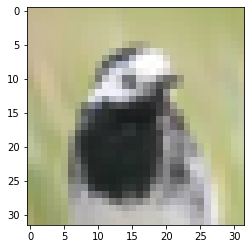

In [79]:
plt.imshow(X_rand[0])

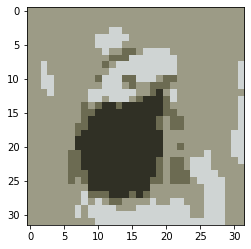

In [80]:
plt.imshow(X_k[0])

(e)

In [81]:
from skimage.color import rgb2gray

X_g = []
for i in range(len(X_rand)):
    temp = rgb2gray(X_rand[i])
    X_g.append(temp)

X_g = np.array(X_g)

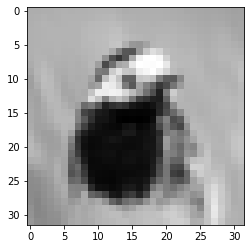

In [82]:
plt.imshow(X_g[0], cmap=plt.cm.gray)

(f)

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [84]:
label_tru = [[0],[1],[2],[3]]

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(label_tru)
label_oh = np.uint8(enc.transform(labels.reshape(-1, 1)).toarray()).reshape(-1, 32, 32, 4)

X_train, X_test, y_train, y_test = train_test_split(X_rand, label_oh, test_size = 0.3333, random_state = 0)

X_train_g = []
for i in range(len(X_train)):
    temp = rgb2gray(X_train[i])
    X_train_g.append(temp)

X_test_g = []
for i in range(len(X_test)):
    temp = rgb2gray(X_test[i])
    X_test_g.append(temp)

X_train_g = np.array(X_train_g).reshape(-1, 32, 32, 1)
X_test_g = np.array(X_test_g).reshape(-1, 32, 32, 1)

In [85]:
X_train_g.shape

(2000, 32, 32, 1)

In [86]:
X_test_g.shape

(1000, 32, 32, 1)

In [87]:
model = models.Sequential(
    [
        layers.Conv2D(64, (5,5), strides = (1, 1), padding = 'same', input_shape = (32, 32, 1)),
        layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'same'),
        
        layers.Conv2D(64, (5,5), strides = (1, 1), padding = 'same', activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'same'),

        layers.Dense(32, activation = 'relu'),
        #layers.Reshape((32,32,4)),
        #layers.Softmax(-1)
        layers.Dense(4, activation = 'softmax')
    ]
)

model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
________________________________________________

In [88]:
res = model.fit(X_train_g, y_train, epochs = 30, validation_data = (X_test_g, y_test))

Epoch 1/30
63/63 [==============================] - 1s 15ms/step - loss: 1.3533 - acc: 0.3666 - val_loss: 1.3292 - val_acc: 0.3655
Epoch 2/30
63/63 [==============================] - 1s 9ms/step - loss: 1.3087 - acc: 0.3730 - val_loss: 1.2916 - val_acc: 0.3574
Epoch 3/30
63/63 [==============================] - 1s 9ms/step - loss: 1.2690 - acc: 0.4028 - val_loss: 1.2480 - val_acc: 0.4307
Epoch 4/30
63/63 [==============================] - 1s 10ms/step - loss: 1.2205 - acc: 0.4692 - val_loss: 1.1941 - val_acc: 0.4989
Epoch 5/30
63/63 [==============================] - 1s 10ms/step - loss: 1.1598 - acc: 0.5300 - val_loss: 1.1251 - val_acc: 0.5588
Epoch 6/30
63/63 [==============================] - 1s 10ms/step - loss: 1.0824 - acc: 0.5858 - val_loss: 1.0383 - val_acc: 0.6071
Epoch 7/30
63/63 [==============================] - 1s 11ms/step - loss: 0.9886 - acc: 0.6293 - val_loss: 0.9396 - val_acc: 0.6475
Epoch 8/30
63/63 [==============================] - 1s 10ms/step - loss: 0.8898 - acc

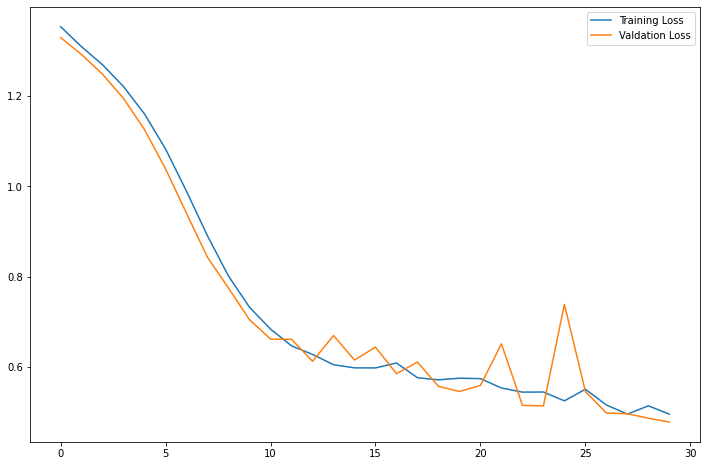

In [89]:
loss = res.history['loss']
val_loss = res.history['val_loss']
epochs = np.arange(30)

plt.figure(figsize = (12,8))
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Valdation Loss')
plt.legend()

In [90]:
pred = model.predict(X_test_g)
pred = pred.reshape(len(X_test_g)*32*32, 4)

img = []
for i in range(len(pred)):
    img.append([int(c) for c in centers[np.argmax(pred[i])]])

In [91]:
img = np.array(img, dtype = np.uint8).reshape(-1, 32, 32, 3)

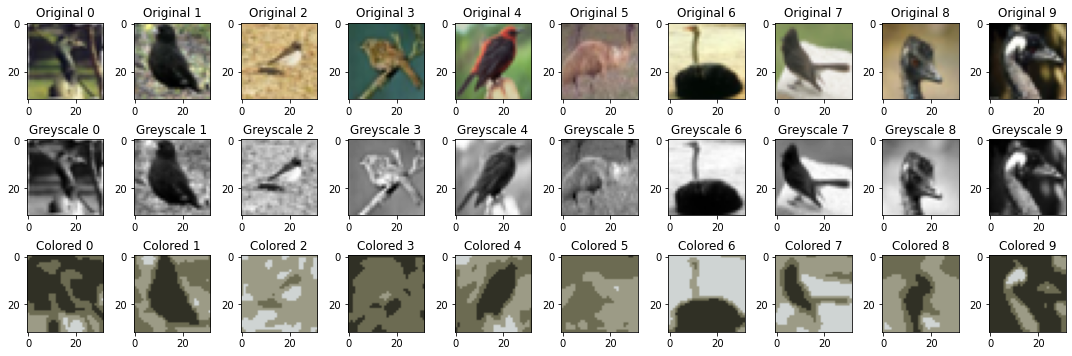

In [92]:
# display the first 10 images from test set
rows = 3
cols = 10
axes=[]
fig=plt.figure()
fig.set_size_inches(15,5)

for i in range(10):
    axes.append(fig.add_subplot(rows, cols, i+1) )
    subplot_title=('Original '+str(i))
    axes[-1].set_title(subplot_title)
    plt.imshow(X_test[i], cmap=plt.cm.gray)
    
    axes.append(fig.add_subplot(rows, cols, 10+i+1) )
    subplot_title=('Greyscale '+str(i))
    axes[-1].set_title(subplot_title)    
    plt.imshow(X_test_g.reshape(-1,32,32)[i], cmap=plt.cm.gray)
    
    axes.append(fig.add_subplot(rows, cols, 20+i+1) )
    subplot_title=('Colored '+str(i))
    axes[-1].set_title(subplot_title)
    plt.imshow(img[i], cmap=plt.cm.gray)

fig.tight_layout()    
plt.show()